Need to get a list of the unique audio recordings

Need to process release forms

In [71]:
import shutil
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
from imutils import contours
from imutils.perspective import four_point_transform
from PIL import Image

In [120]:
data_directory_path = Path('/Users/dlisla/Desktop/ken-wise_fire-recordings/')
audio_directory_1_path = data_directory_path.joinpath('Fire Interviews')
audio_directory_2_path = data_directory_path.joinpath('Fire Recordings')
image_directory_path = data_directory_path.joinpath('release_forms')


In [121]:
audio_1_paths_list = [x for x in audio_directory_1_path.iterdir() if x.is_file()]
audio_2_paths_list = [x for x in audio_directory_2_path.iterdir() if x.is_file()]

len(audio_1_paths_list), len(audio_2_paths_list)

(60, 43)

In [122]:
extension_list = []

for audio_path in audio_1_paths_list:
    extension_list.append(audio_path.suffix)

for audio_path in audio_2_paths_list:
    extension_list.append(audio_path.suffix)
    
extension_list = set(extension_list)
extension_list

{'.MP3', '.WAV', '.WMA'}

In [123]:
output_directory_path = data_directory_path.joinpath('audio_combined')
output_directory_path.mkdir(exist_ok=True)

In [124]:
all_audio_paths = audio_1_paths_list + audio_2_paths_list
len(all_audio_paths)

103

In [133]:
# there are 2 directories of recordings
# sanitize filenames copy into a single directory

duplicates_list = []

for audio_path in all_audio_paths:
    filename = audio_path.stem
    extension = audio_path.suffix
    
    if filename.endswith('Copy'):  # remove word copy from end of filename
        # print(f'{audio_path} ends with "Copy"')
        filename = filename.split('Copy')[0]
        # print(filename)
    
    while filename.endswith(' ') or filename.endswith('-'):  # remove spaces & hyphens from filenames
        print(f'{filename}***--->***{filename[:-1]}***')
        filename = filename[:-1]
    
    # print(f'{filename}...')
    copy_to_path = output_directory_path.joinpath(f'{filename}{extension}')
    # print(copy_to_path)
    
    if copy_to_path.is_file():
        if copy_to_path.stat().st_size == audio_path.stat().st_size:
            # print(f'{audio_path} is same size as {copy_to_path}')
            duplicates_list.append(audio_path)
        else:
            print(f'{audio_path} is NOT same size as {copy_to_path}')
        #print(audio_path)

    # copy file
    shutil.copyfile(audio_path, copy_to_path)

print('')
print(f'{len(duplicates_list)} duplicate audio recordings based on file size')

Fran Day 3 31 17 VN800052 ***--->***Fran Day 3 31 17 VN800052***
Rachel Bogart 2 10 17 VN800030 ***--->***Rachel Bogart 2 10 17 VN800030***
Ann Phillips 1 26 17 RNC007 - ***--->***Ann Phillips 1 26 17 RNC007 -***
Ann Phillips 1 26 17 RNC007 -***--->***Ann Phillips 1 26 17 RNC007 ***
Ann Phillips 1 26 17 RNC007 ***--->***Ann Phillips 1 26 17 RNC007***
Bill Black 2 15 17 VN800035 - ***--->***Bill Black 2 15 17 VN800035 -***
Bill Black 2 15 17 VN800035 -***--->***Bill Black 2 15 17 VN800035 ***
Bill Black 2 15 17 VN800035 ***--->***Bill Black 2 15 17 VN800035***
Fran Day 3 31 17 VN800052 ***--->***Fran Day 3 31 17 VN800052***
Andrea Ludden 2 6 17 RNC014 - ***--->***Andrea Ludden 2 6 17 RNC014 -***
Andrea Ludden 2 6 17 RNC014 -***--->***Andrea Ludden 2 6 17 RNC014 ***
Andrea Ludden 2 6 17 RNC014 ***--->***Andrea Ludden 2 6 17 RNC014***
Bill & Diana Hale 2 8 17 RNC018 - ***--->***Bill & Diana Hale 2 8 17 RNC018 -***
Bill & Diana Hale 2 8 17 RNC018 -***--->***Bill & Diana Hale 2 8 17 RNC018 

In [73]:
image_paths_list = sorted(image_directory_path.glob('*.j2k'))
len(image_paths_list)

61

In [5]:
image_paths_list[:4]

[PosixPath('/Users/dlisla/Desktop/ken-wise_fire-recordings/release_forms/image0001(2).j2k'),
 PosixPath('/Users/dlisla/Desktop/ken-wise_fire-recordings/release_forms/image0001.j2k'),
 PosixPath('/Users/dlisla/Desktop/ken-wise_fire-recordings/release_forms/image0002(2).j2k'),
 PosixPath('/Users/dlisla/Desktop/ken-wise_fire-recordings/release_forms/image0002.j2k')]

In [74]:
release_forms_output_directory_path = data_directory_path.joinpath('release_forms_jpg')
release_forms_output_directory_path.mkdir(exist_ok=True)

In [64]:
image_paths_no_parentheses_list = [x for x in image_paths_list if not x.stem.endswith(')')]
image_paths_no_parentheses_list[:4]

[PosixPath('/Users/dlisla/Desktop/ken-wise_fire-recordings/release_forms/image0001.j2k'),
 PosixPath('/Users/dlisla/Desktop/ken-wise_fire-recordings/release_forms/image0002.j2k'),
 PosixPath('/Users/dlisla/Desktop/ken-wise_fire-recordings/release_forms/image0003.j2k'),
 PosixPath('/Users/dlisla/Desktop/ken-wise_fire-recordings/release_forms/image0004.j2k')]

In [65]:
image_paths_parentheses_list = [x for x in image_paths_list if x not in image_paths_no_parentheses_list]
image_paths_parentheses_list[:4]

[PosixPath('/Users/dlisla/Desktop/ken-wise_fire-recordings/release_forms/image0001(2).j2k'),
 PosixPath('/Users/dlisla/Desktop/ken-wise_fire-recordings/release_forms/image0002(2).j2k'),
 PosixPath('/Users/dlisla/Desktop/ken-wise_fire-recordings/release_forms/image0003(2).j2k'),
 PosixPath('/Users/dlisla/Desktop/ken-wise_fire-recordings/release_forms/image0004(2).j2k')]

In [66]:
for index, image_path in enumerate(image_paths_no_parentheses_list, start=1):
    new_filename = f'release_forms_{str(index).zfill(4)}.j2k'
    copy_to_path = release_forms_output_directory_path.joinpath(new_filename)
    shutil.copyfile(image_path, copy_to_path)

In [69]:
start_number = len(list(release_forms_output_directory_path.glob('*.j2k'))) + 1  # set new start number for renaming

for index, image_path in enumerate(image_paths_parentheses_list, start=start_number):
    new_filename = f'release_forms_{str(index).zfill(4)}.j2k'
    copy_to_path = release_forms_output_directory_path.joinpath(new_filename)
    shutil.copyfile(image_path, copy_to_path)

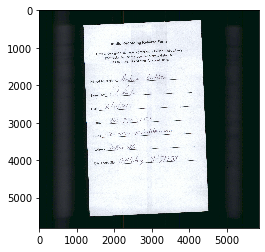

In [75]:
# test opening *.j2k file with PIL

image = Image.open(image_paths_list[1])
image.save(release_forms_output_directory_path.joinpath('test.tif'))
image_test = Image.open(release_forms_output_directory_path.joinpath('test.tif'))
plt.imshow(image_test)

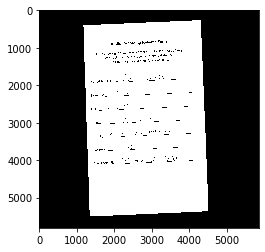

In [76]:
# load the image, convert it to grayscale, blur it
# slightly, then find edges
cv2_image = np.array(image)
gray = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# apply Otsu's thresholding method to binarize the warped
# piece of paper
thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plt.imshow(thresh, cmap='gray')

In [9]:
# grab the (x, y) coordinates of all pixel values that
# are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all
# coordinates
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
 
# the `cv2.minAreaRect` function returns values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle
if angle < -45:
    angle = -(90 + angle)
 
# otherwise, just take the inverse of the angle to make
# it positive
else:
    angle = -angle

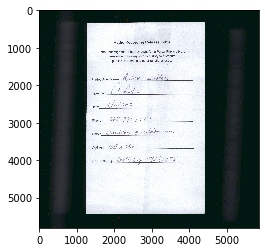

In [77]:
# rotate the cv2_image to deskew it
(h, w) = cv2_image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(cv2_image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

plt.imshow(rotated, cmap='gray')

In [78]:
gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# apply Otsu's thresholding method to binarize the warped
# piece of paper
thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# find contours in the edge map, then initialize
# the contour that corresponds to the document
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
docCnt = None
 
# ensure that at least one contour was found
if len(cnts) > 0:
    # sort the contours according to their size in
    # descending order
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
    # loop over the sorted contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
        # if our approximated contour has four points,
        # then we can assume we have found the paper
        if len(approx) == 4:
            docCnt = approx
            break

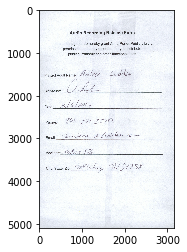

In [79]:
paper = four_point_transform(rotated, docCnt.reshape(4, 2))

plt.imshow(paper)

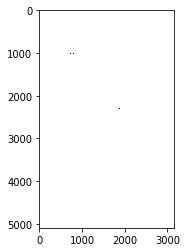

In [94]:
paper_gray = cv2.cvtColor(paper, cv2.COLOR_BGR2GRAY)
paper_thresh = cv2.adaptiveThreshold(paper_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=3, C=25)

plt.imshow(paper_thresh, cmap='gray')

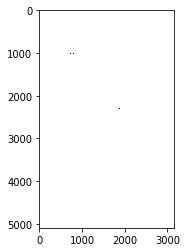

In [95]:
pil_image = Image.fromarray(paper_thresh)
output_path = release_forms_output_directory_path.joinpath('test21.tif')

bitonal_image = pil_image.convert(mode='1', dither=None)

# group4 compression not working!
bitonal_image.save(str(output_path), compression='group4')

# bitonal_image.save(output_path)

plt.imshow(bitonal_image, cmap='gray')

In [102]:
# process image with range of blockSizes & Constant settings for adaptive thresholding

paper_gray = cv2.cvtColor(paper, cv2.COLOR_BGR2GRAY)
for i in range(3, 26, 2):
    
    for j in range(5, 125, 5):
    
        paper_thresh = cv2.adaptiveThreshold(paper_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=i, C=j)
    
        outpath = release_forms_output_directory_path.joinpath(f'blockSize_{str(i)}_C_{str(j)}.tif')
        outstring = str(outpath)
    
        paper_thresh = Image.fromarray(paper_thresh)
        bitonal_image = paper_thresh.convert(mode='1', dither=None)
    
        bitonal_image.save(outstring, compression='group4')  # not accepting paths for output when compression is included

In [119]:
# process all images

# block size must be odd, increasing block size will increase thickness of the lines
block_size = 125  # must be odd

# increasing constant will remove noise and make background cleaner
C = 25

renamed_image_paths_list = sorted(release_forms_output_directory_path.glob('*.j2k'))
number_of_images_to_process = len(renamed_image_paths_list)

print(f'{number_of_images_to_process} {renamed_image_paths_list[0].suffix} to autocrop & binarize')

# create *.tif directory
tif_directory_path = release_forms_output_directory_path.joinpath('bitonal_tif')
tif_directory_path.mkdir(exist_ok=True)

for image_path in renamed_image_paths_list:
    # print(image_path)
    
    # load image
    image = Image.open(image_path)
    
    # convert to openCV image, convert it to grayscale, blur it slightly
    image = np.array(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # apply Otsu's thresholding method to binarize the warped
    # piece of paper
    thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    # grab the (x, y) coordinates of all pixel values that
    # are greater than zero, then use these coordinates to
    # compute a rotated bounding box that contains all
    # coordinates
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
 
    # the `cv2.minAreaRect` function returns values in the
    # range [-90, 0); as the rectangle rotates clockwise the
    # returned angle trends to 0 -- in this special case we
    # need to add 90 degrees to the angle
    if angle < -45:
        angle = -(90 + angle)
 
    # otherwise, just take the inverse of the angle to make
    # it positive
    else:
        angle = -angle
        
    # rotate the image to deskew it
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # apply Otsu's thresholding method to binarize the warped
    # piece of paper
    thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # find contours in the edge map, then initialize
    # the contour that corresponds to the document
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    docCnt = None
 
    # ensure that at least one contour was found
    if len(cnts) > 0:
        # sort the contours according to their size in
        # descending order
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
        # loop over the sorted contours
        for c in cnts:
            # approximate the contour
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
            # if our approximated contour has four points,
            # then we can assume we have found the paper
            if len(approx) == 4:
                docCnt = approx
                break
    
    # four point transform, even though it probably doesn't need keystone correction . . . 
    paper = four_point_transform(rotated, docCnt.reshape(4, 2))
    
    paper_gray = cv2.cvtColor(paper, cv2.COLOR_BGR2GRAY)
    paper_thresh = cv2.adaptiveThreshold(paper_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=block_size, C=C)
    
    # set output path
    output_path = tif_directory_path.joinpath(f'{image_path.stem}.tif')
    
    # convert to PIL image & make sure it's a bitonal file
    output_image = Image.fromarray(paper_thresh).convert(mode='1', dither=None)
    
    # save image
    output_image.save(str(output_path), compression='group4')

61 .j2k to autocrop & binarize
